In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chisquare
from sklearn import model_selection

In [2]:
data =  pd.read_csv("D:/Program_files/Python/baseball/baseball.csv",header=0);

In [3]:
data.shape

(1232, 15)

In [4]:
data.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [5]:
data.head(20)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


In [7]:
df = data[['Team','League','Year','RS','RA','W','OBP',
          'SLG','BA','Playoffs','G','OOBP','OSLG']]

In [9]:
df.shape

(1232, 13)

In [16]:
df['Team'].value_counts()

PHI    47
NYY    47
STL    47
BOS    47
SFG    47
CHW    47
NYM    47
LAD    47
HOU    47
MIN    47
CHC    47
CLE    47
CIN    47
PIT    47
BAL    47
DET    47
ATL    43
OAK    41
KCR    40
SDP    40
MIL    39
TEX    37
TOR    33
SEA    33
MON    32
CAL    28
COL    18
FLA    17
ARI    15
LAA    11
TBD    10
WSA    10
ANA     8
WSN     8
KCA     6
TBR     5
MLN     4
SEP     1
MIA     1
Name: Team, dtype: int64

In [17]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,165.000000,0.384000,0.499000


In [18]:
df.dtypes

Team         object
League       object
Year          int64
RS            int64
RA            int64
W             int64
OBP         float64
SLG         float64
BA          float64
Playoffs      int64
G             int64
OOBP        float64
OSLG        float64
dtype: object

In [22]:
#df['Year'] = pd.to_datetime(df['Year'], format="%Y").dt.year

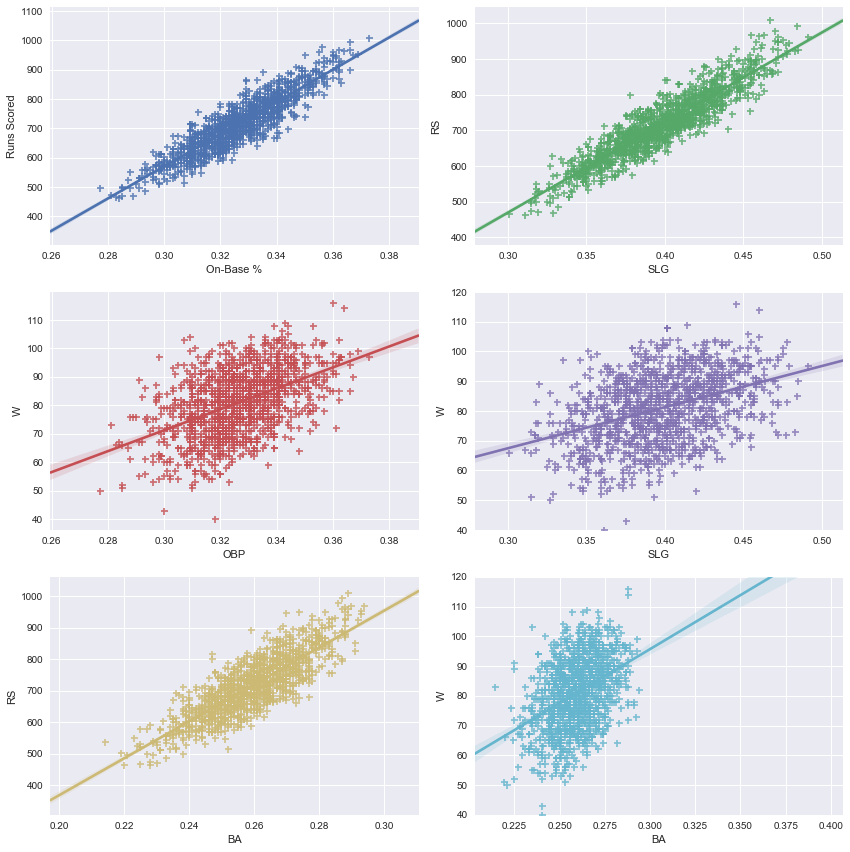

In [48]:
fig = plt.figure(figsize=(12,12))
#fig.suptitle("Offensive stats and its impact on Runs Scored and Wins")
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.regplot(x="OBP", y="RS", data=df, scatter=True, marker="+", ax=ax1)
sns.regplot(x="SLG", y="RS", data=df, scatter=True, marker="+", ax=ax2)
sns.regplot(x="OBP", y="W", data=df, scatter=True, marker="+", ax=ax3)
sns.regplot(x="SLG", y="W", data=df, scatter=True, marker="+", ax=ax4)
sns.regplot(x="BA", y="RS", data=df, scatter=True, marker="+", ax=ax5)
sns.regplot(x="BA", y="W", data=df, scatter=True, marker="+", ax=ax6)
ax1.set_xlabel("On-Base %")
ax1.set_ylabel("Runs Scored")
ax4.set_ylim([40,120])
ax6.set_ylim([40,120])
sns.despine()
plt.tight_layout()
plt.show()

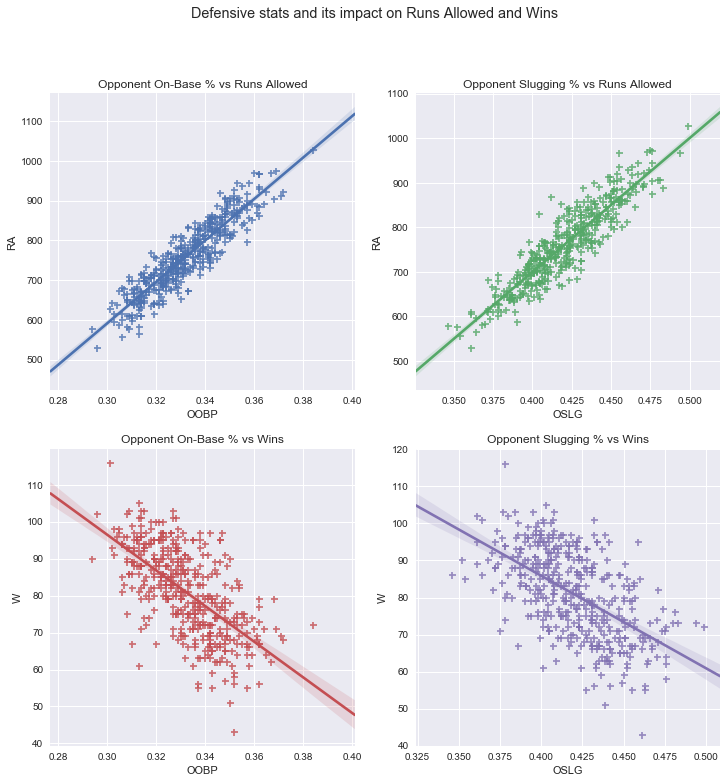

In [46]:
fig = plt.figure(figsize=(12,12))
fig.suptitle("Defensive stats and its impact on Runs Allowed and Wins")
ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Opponent On-Base % vs Runs Allowed")
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Opponent Slugging % vs Runs Allowed")
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Opponent On-Base % vs Wins")
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Opponent Slugging % vs Wins")
sns.regplot(x="OOBP", y="RA", data=df, scatter=True, marker="+", ax=ax1)
sns.regplot(x="OSLG", y="RA", data=df, scatter=True, marker="+", ax=ax2)
sns.regplot(x="OOBP", y="W", data=df, scatter=True, marker="+", ax=ax3)
sns.regplot(x="OSLG", y="W", data=df, scatter=True, marker="+", ax=ax4)
ax4.set_ylim([40,120])
plt.show()

In [49]:
corr_df = df.corr()
corr_df

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,0.022208,-0.433572,-0.366744
G,0.009287,0.075195,-0.023369,0.105309,0.016563,0.036770,0.019886,0.022208,1.000000,-0.077055,-0.004188
OOBP,-0.371869,0.133981,0.910344,-0.634315,0.120349,0.143861,0.187108,-0.433572,-0.077055,1.000000,0.830902


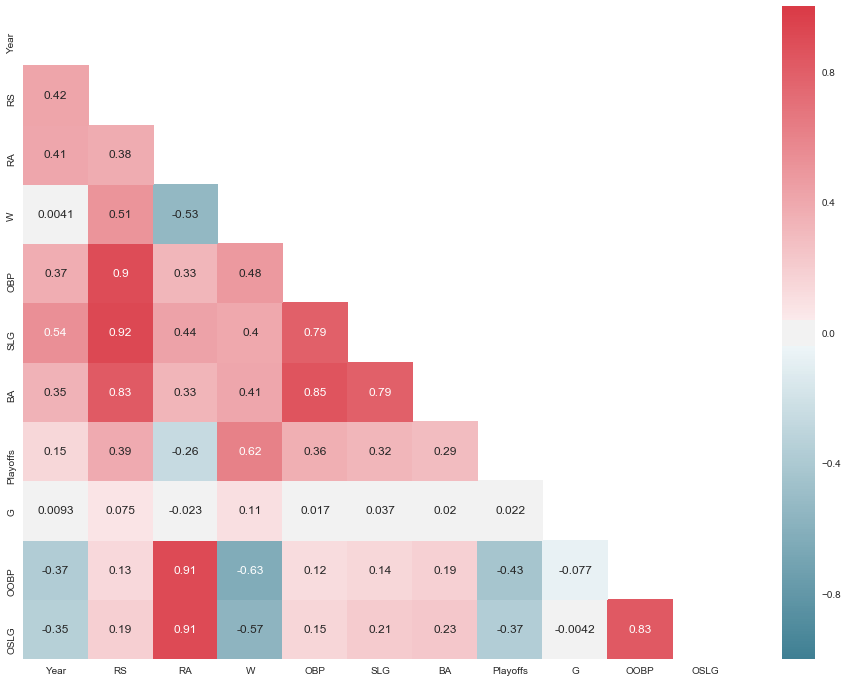

In [57]:
fig = plt.figure(figsize=(16,12))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_style("white")
sns.heatmap(corr_df, mask=mask, cmap=cmap, annot=True)
plt.show()

In [58]:
obp_mean = df['OBP'].mean()
slg_mean = df['SLG'].mean()
ba_mean = df['BA'].mean()
oobp_mean = df['OOBP'].mean()
oslg_mean = df['OSLG'].mean()

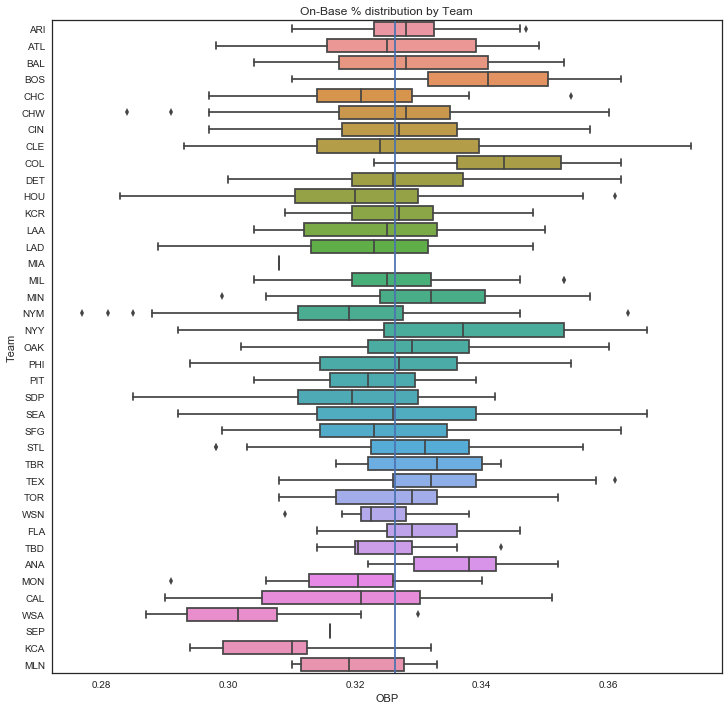

In [59]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x=df['OBP'], y=df['Team'], ax=ax)
plt.title("On-Base % distribution by Team")
plt.axvline(obp_mean)
plt.show()

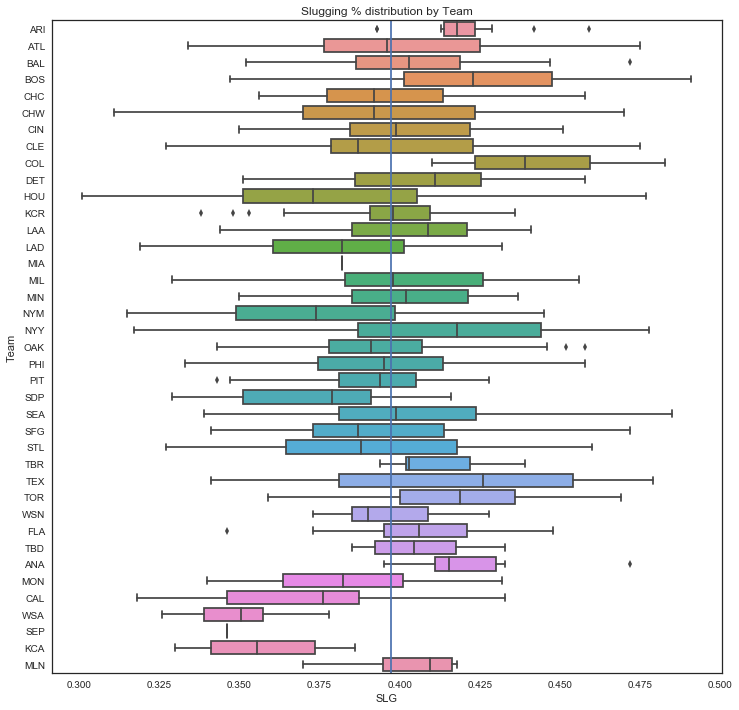

In [60]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax = sns.boxplot(x=df['SLG'], y=df['Team'], ax=ax)
plt.title("Slugging % distribution by Team")
plt.axvline(slg_mean)
plt.show()

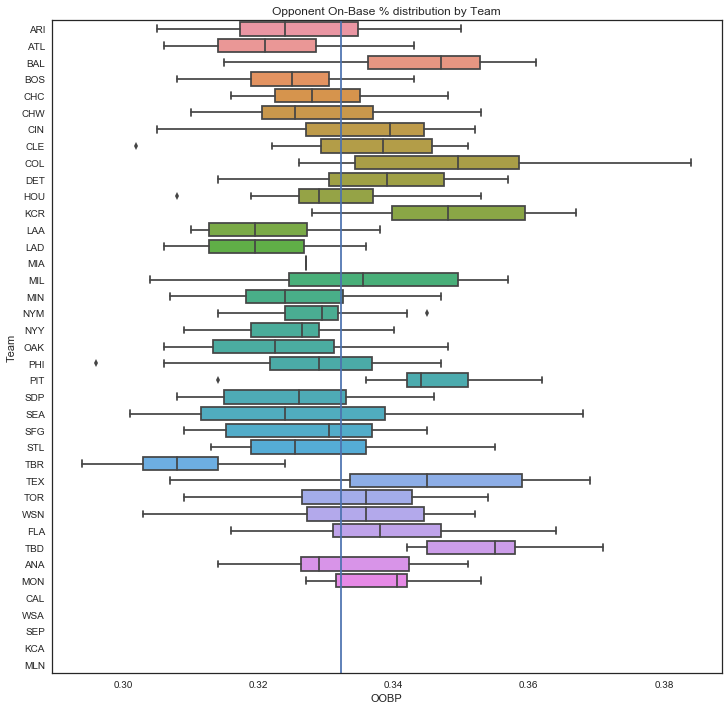

In [61]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x=df['OOBP'], y=df['Team'], ax=ax)
plt.title("Opponent On-Base % distribution by Team")
plt.axvline(oobp_mean)
plt.show()

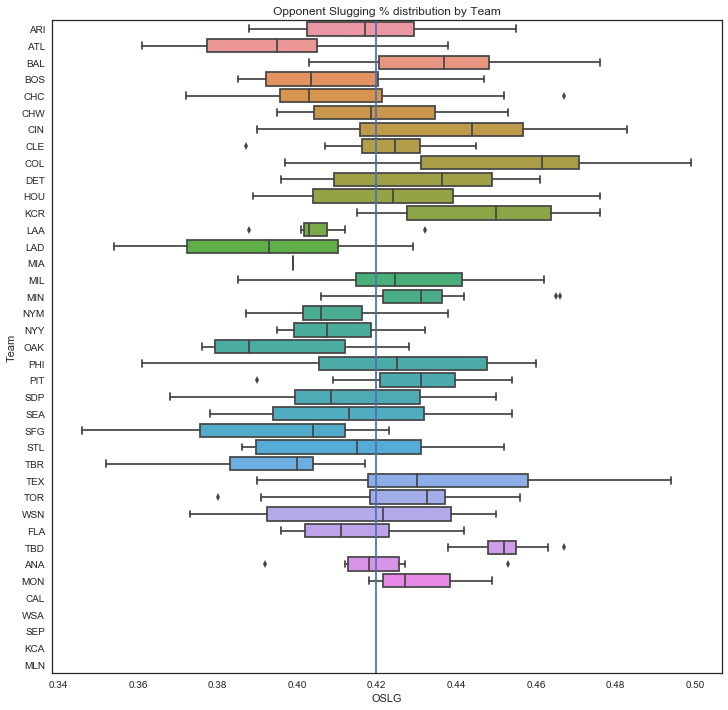

In [62]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x=df['OSLG'], y=df['Team'], ax=ax)
plt.title("Opponent Slugging % distribution by Team")
plt.axvline(oslg_mean)
plt.show()

In [63]:
teams = ['BOS', 'NYY', 'HOU', 'CHC', 'NYM', 'LAD']
exp_df = df.loc[df['Team'].isin(teams)]
exp_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
3,BOS,AL,2012.0,734.0,806.0,69.0,0.315,0.415,0.260,0.0,162.0,0.331,0.428
4,CHC,NL,2012.0,613.0,759.0,61.0,0.302,0.378,0.240,0.0,162.0,0.335,0.424
10,HOU,NL,2012.0,583.0,794.0,55.0,0.302,0.371,0.236,0.0,162.0,0.337,0.427
13,LAD,NL,2012.0,637.0,597.0,86.0,0.317,0.374,0.252,0.0,162.0,0.310,0.364
17,NYM,NL,2012.0,650.0,709.0,74.0,0.316,0.386,0.249,0.0,162.0,0.315,0.401


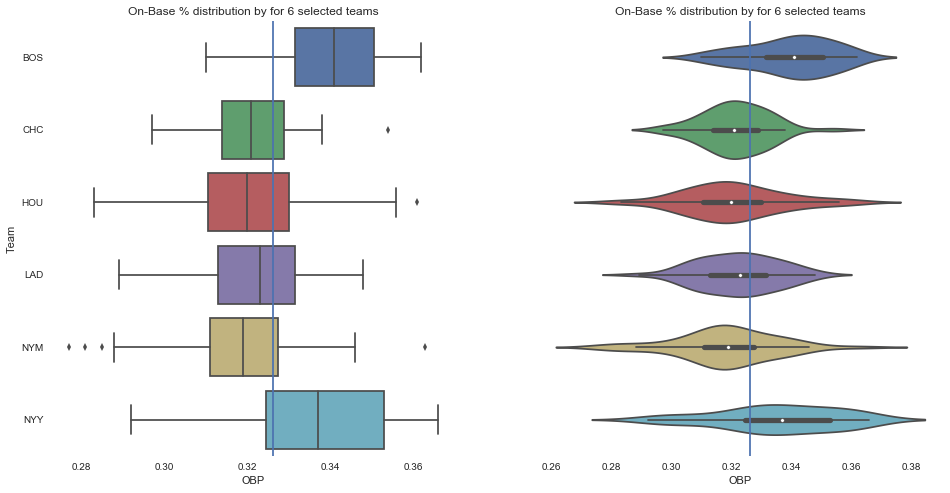

In [66]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=exp_df['OBP'], y=exp_df['Team'], ax=ax1)
sns.violinplot(x=exp_df['OBP'], y=exp_df['Team'], ax=ax2)
ax1.set_title("On-Base % distribution by for 6 selected teams")
ax2.set_title("On-Base % distribution by for 6 selected teams")
# I will use the "global" mean here
ax1.axvline(obp_mean)
ax2.axvline(obp_mean)
ax2.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()

In [69]:
playoff = {}
for team in teams:
    team_playoff = exp_df.loc[exp_df['Team'] == team, 'Playoffs'].sum()
    playoff[team] = team_playoff
print(playoff)

{'CHC': 6.0, 'LAD': 14.0, 'NYM': 7.0, 'NYY': 23.0, 'BOS': 13.0, 'HOU': 8.0}


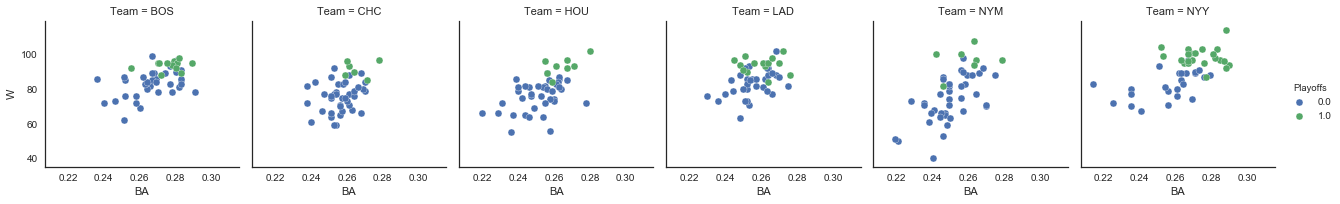

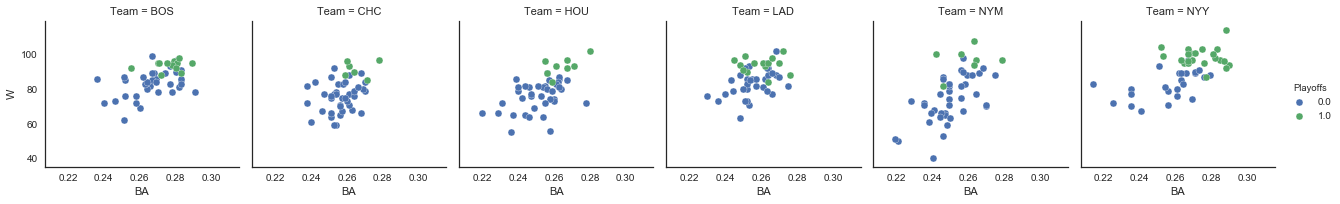

In [71]:
g = sns.FacetGrid(exp_df, col='Team', hue='Playoffs')
g = g.map(plt.scatter, 'BA', 'W', edgecolor="w").add_legend()
plt.show()

In [72]:
nl = df[df['League'] == 'NL']
al = df[df['League'] == 'AL']

In [73]:
nl.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012.0,734.0,688.0,81.0,0.328,0.418,0.259,0.0,162.0,0.317,0.415
1,ATL,NL,2012.0,700.0,600.0,94.0,0.320,0.389,0.247,1.0,162.0,0.306,0.378
4,CHC,NL,2012.0,613.0,759.0,61.0,0.302,0.378,0.240,0.0,162.0,0.335,0.424
6,CIN,NL,2012.0,669.0,588.0,97.0,0.315,0.411,0.251,1.0,162.0,0.305,0.390
8,COL,NL,2012.0,758.0,890.0,64.0,0.330,0.436,0.274,0.0,162.0,0.357,0.470


In [79]:
t_test_runs_scored = ttest_ind(nl['RS'].values, al['RS'].values, equal_var=False)

In [80]:
print(t_test_runs_scored)

Ttest_indResult(statistic=-6.7600258899934706, pvalue=2.1418497956453986e-11)


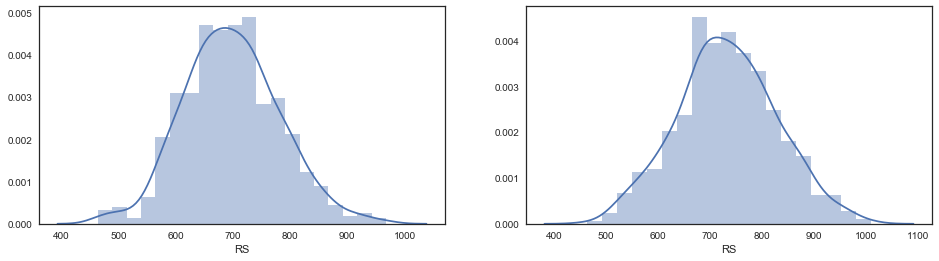

In [81]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.distplot(nl['RS'], ax=ax1)
sns.distplot(al['RS'], ax=ax2)
plt.show()

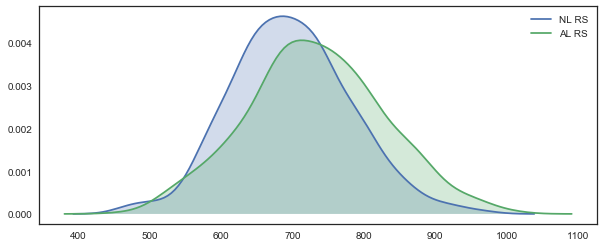

In [82]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)
sns.kdeplot(nl['RS'], ax=ax1, legend=True, shade=True, label='NL RS')
sns.kdeplot(al['RS'], ax=ax1, legend=True, shade=True, label='AL RS')
plt.show()